## Final Project Submission

Please fill out:
* Student name: Dorine Langat
* Student pace:  full time
* Scheduled project review date/time: 21/04/2023
* Instructor name: 
* Blog post URL:


## Project Overview
This project analyzes house sales in a northwestern county using multiple linear regression modeling to provide insights and recommendations to a real estate agency.

## Business Problem

The project objectives we aim to solve include:

1. To identify features influencing the pricing.

2. To analyse trends in house prices over time (time series analysis) and predict future prices.

3. To identify undervalued properties (outlier detection) and recommend better prices that will help the agency maximise on profits.

## Data Understanding

The relevant dataset used in this project is the [kc_house_data](https://github.com/dorinelangat/dsc-phase-2-project-v2-3/tree/main/data), found in the data folder of this repository.

The dataset contains information on sale prices for houses, property sizes, location, and the years of construction and renovation alongside other relavant information.


In [6]:
# Import Libraries 

# Data
import pandas as pd
import numpy as np 

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

# Modeling 
import statsmodels.api as sm

# statistics
import scipy.stats as stats
# styling
plt.style.use('seaborn')
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [7]:
# Your code here - remember to use markdown cells for comments as well!
data = pd.read_csv('kc_house_data.csv', index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [9]:
import numpy as np
# Replace "?" and " " values with NaN
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan).replace('', np.nan)

# Convert the column to float data type
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [10]:
# Convert the 'date' column to a datetime data type
data['date'] = pd.to_datetime(data['date'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipco

In [12]:
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [ ]:
data['grade'].nunique()

11

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Outlier Detection

In this section, we are going to identify the undervalued properties and come up with a new pricing strategy.

Our focus will be on the target variable(price), and the predictor variables(property size, age, and condition of the property.)

In [ ]:
# describing the price column to know the central limit tendencies.
data['price'].describe()

count    1.542900e+04
mean     5.414978e+05
std      3.730219e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.435000e+05
max      7.700000e+06
Name: price, dtype: float64

Let's look at the distribution of the sale prices 

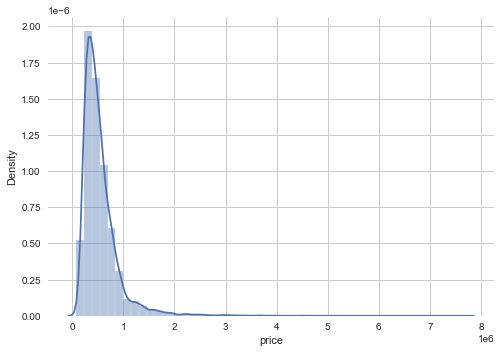

In [ ]:
sns.distplot(data.price);

The price distribution has a slight positive skew to the right.

Let's identify a highly correlated predictor by looking at the correlation coefficients for all the predictors

In [ ]:
data.corr()['price']

price            1.000000
bedrooms         0.305792
bathrooms        0.525655
sqft_living      0.706498
sqft_lot         0.084687
floors           0.260143
sqft_above       0.612374
sqft_basement    0.320053
yr_built         0.050528
yr_renovated     0.120981
zipcode         -0.049371
lat              0.306991
long             0.021948
sqft_living15    0.583400
sqft_lot15       0.080569
Name: price, dtype: float64

The predictor column with the highest correlation is `sqft_living` which we have just created.

We therefore create a scatter plot of our most correlated variable with the price.

In [ ]:
one_hot = pd.get_dummies(data['condition'], drop_first=True) 
df = data.drop('condition',axis = 1)
df = data.join(one_hot)

In [ ]:
count = 0
price_outliers = []
mean = np.mean(data['price'])
# 
max_distance = np.std(data['price']) * 3 

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count
df = df.join(one_hot)

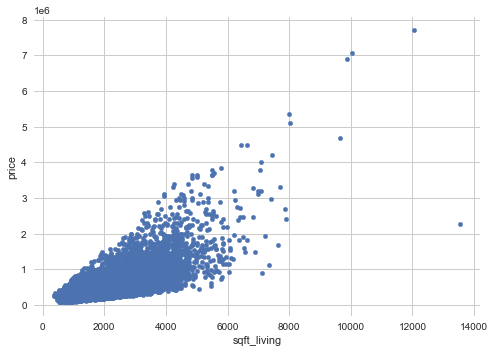

In [ ]:
data.plot.scatter(x="sqft_living", y="price");

### Building a Baseline Model

In [ ]:
y = data['price']
X_baseline = data[['sqft_living']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:55:30   Log-Likelihood:            -2.1450e+05
No. Observations:               15429   AIC:                         4.290e+05
Df Residuals:                   15427   BIC:                         4.290e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -5.62e+04   5268.236    -10.668      

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 49.9% of the variance in price
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* The coefficient for sqft_living is 286.5963, which means that for every additional square foot of living space, the price of the property increases by $286.60.
* The intercept (const) of the model is -56200, which means that when the size of the living space is zero, the estimated price is -$56,200. However, this value does not have a practical interpretation since it is not possible for a house to have zero square feet of living space.
* The Jarque-Bera test for normality shows that the errors are not normally distributed since the p-value is less than 0.05. This suggests that there may be some non-linearity or heteroscedasticity in the relationship between the independent variable and dependent variable.

Overall, we can conclude that sqft_living is a significant predictor of price, but there may be other factors that also affect the price of a property. Additionally, the model may not be the best fit for the data due to the issues with normality and multicollinearity.

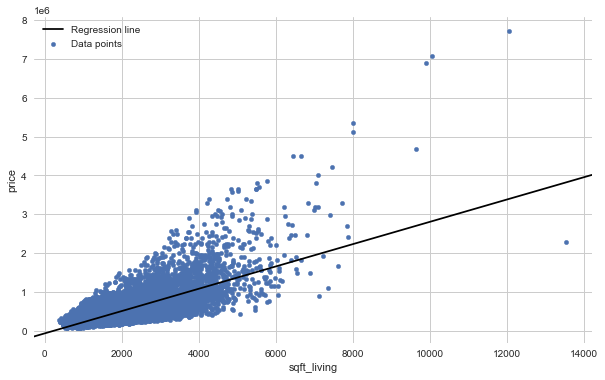

In [ ]:
# plotting the regression line
fig, ax = plt.subplots(figsize=(10,6))
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

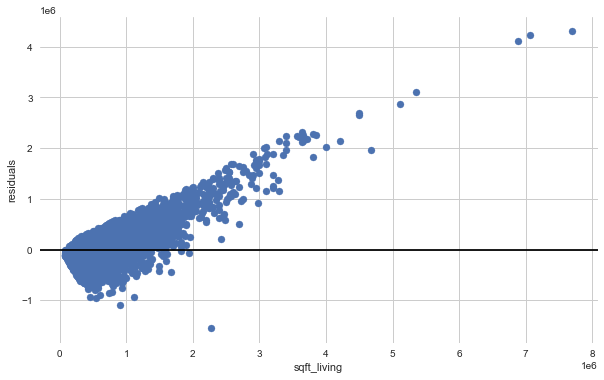

In [ ]:
# plotting the residuals
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

Based on this visualization, we can confirm the linearity of our data. However, we can't fail to notice the presence of outliers.

These outliers could indicate the presence of undervalued or overpriced properties.

Thus the need to introduce another feature to draw more insights into our analysis.

### Preparing a Categorical Feature for Multiple Linear Regression

In order to identify a promising categorical predictor, we need to create bar graphs for each of these categorical features.

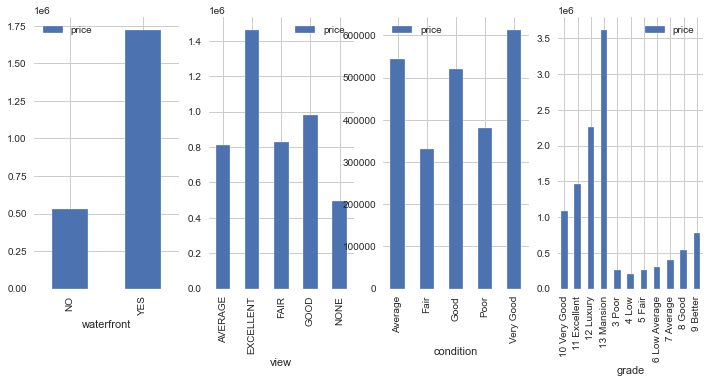

In [ ]:
categorical_features = data.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    data.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Condition column seems ideal for our analysis. We're therefore going to move forward with it.

In [ ]:
data['grade'].value_counts()

7 Average        6405
8 Good           4338
9 Better         1875
6 Low Average    1454
10 Very Good      816
11 Excellent      286
5 Fair            161
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: grade, dtype: int64

In [ ]:
data['condition'].value_counts()

Average      10009
Good          4046
Very Good     1229
Fair           127
Poor            18
Name: condition, dtype: int64

In [ ]:
# creating a dataframe containing our predictor variables.
X_iterated_cond = data[['sqft_living', 'condition']]
X_iterated_cond.head()

,sqft_living,condition
id,,
6414100192,2570,Average
2487200875,1960,Very Good
1954400510,1680,Average
7237550310,5420,Average
2414600126,1780,Average


Before creating our multiple linear regression model, we need to preprocess our categorical variable by creating dummy variables for it.

we will not `drop_first=True` yet, because we want to set a meaningful reference category.

In [ ]:
# Using pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated_cond = pd.get_dummies(X_iterated_cond, columns=['condition'])
X_iterated_cond

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
id,,,,,,
6414100192,2570,1,0,0,0,0
2487200875,1960,0,0,0,0,1
1954400510,1680,1,0,0,0,0
7237550310,5420,1,0,0,0,0
2414600126,1780,1,0,0,0,0
...,...,...,...,...,...,...
2997800021,1310,1,0,0,0,0
263000018,1530,1,0,0,0,0
6600060120,2310,1,0,0,0,0


The category that makes the most sense as a baseline is the `average` category, and we're going to drop it.

In [ ]:
X_iterated_cond.drop('condition_Average', axis=1, inplace=True)

### Building a Multiple Linear regression

In [ ]:
iterated_model= sm.OLS(y, sm.add_constant(X_iterated_cond))
iterated_results = iterated_model.fit()
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     3160.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:59:19   Log-Likelihood:            -2.1440e+05
No. Observations:               15429   AIC:                         4.288e+05
Df Residuals:                   15423   BIC:                         4.288e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.903e+04   5

In [ ]:
X_iterated_grd = data[['sqft_living', 'grade']]
X_iterated_grd.head()

,sqft_living,grade
id,,
6414100192,2570,7 Average
2487200875,1960,7 Average
1954400510,1680,8 Good
7237550310,5420,11 Excellent
2414600126,1780,7 Average


In [ ]:
X_iterated_grd = pd.get_dummies(X_iterated_grd, columns=['grade'])
X_iterated_grd

,sqft_living,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,
6414100192,2570,0,0,0,0,0,0,0,0,1,0,0
2487200875,1960,0,0,0,0,0,0,0,0,1,0,0
1954400510,1680,0,0,0,0,0,0,0,0,0,1,0
7237550310,5420,0,1,0,0,0,0,0,0,0,0,0
2414600126,1780,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2997800021,1310,0,0,0,0,0,0,0,0,0,1,0
263000018,1530,0,0,0,0,0,0,0,0,0,1,0
6600060120,2310,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
one_hot = pd.get_dummies(data['condition'], drop_first=True) 
data_1 = data.drop('condition',axis = 1)
data_1 = data.join(one_hot)

NameError: name 'data' is not defined

In [ ]:
count = 0
price_outliers = []
mean = np.mean(data['price'])
max_distance = np.std(data['price'])

# create a new empty DataFrame to store the outliers
data_outliers = pd.DataFrame(columns=data.columns)

for idx, row in data['price'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        # append the outlier row to the data_outliers DataFrame
        data_outliers = data_outliers.append(data.loc[idx])
        # add the index of the outlier row to the price_outliers list (if needed)
        price_outliers.append(idx)

# print the count of outliers found
print(f"{count} outliers found")

# join the one-hot encoded DataFrame to the cleaned data DataFrame (without outliers)
data_3 = data.join(one_hot)

# print the head of the data_outliers DataFrame to check that the outliers were correctly appended
data_outliers.head()


KeyboardInterrupt: 

In [ ]:
# print the head of the cleaned DataFrame with the one-hot encoded variables included
data_3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Fair,Good,Poor,Very Good
id,,,,,,,,,,,,,,,,,,,,,
1000102,2015-04-22,300000.0,6,3.0,2400,9373,2.0,NO,NONE,Average,...,0.0,98002,47.3262,-122.214,2060,7316,0,0,0,0
1200021,2014-08-11,400000.0,3,1.0,1460,43000,1.0,NO,NONE,Average,...,0.0,98166,47.4434,-122.347,2250,20023,0,0,0,0
2800031,2015-04-01,235000.0,3,1.0,1430,7599,1.5,NO,NONE,Good,...,0.0,98168,47.4783,-122.265,1290,10320,0,1,0,0
3600057,2015-03-19,402500.0,4,2.0,1650,3504,1.0,NO,NONE,Average,...,2013.0,98144,47.5803,-122.294,1480,3504,0,0,0,0
5200087,2014-07-09,487000.0,4,2.5,2540,5001,2.0,NO,NONE,Average,...,0.0,98108,47.5423,-122.302,2360,6834,0,0,0,0
